# __......................................................بسم الله الرحمن الرحيم......................................................__

# __................................................Cats and Dogs Dataset................................................__

## __Notebook Overview:__

__In This Projet We are Bulding a Classefair for Classifaing Cats and Dogs Image Using CNN.__

 __• The Targeted Dataset:__ Cats and Dogs Dataset  - a dataset that Contain Images for Cats and Dogs.

__• The Objective:__ Bing able to Classify an Input Image to eather Being Cat or Dog.

 __• Tasks:__

[1- Importing, Exploring and Augmenting Data.](#1)
<a id='5'></a>

[2- Bulding the Model.](#4)
<a id='8'></a>

[3- Evaluating the Model.](#5)
<a id='9'></a>

## __Notabook Code:__

<a id='1'></a>
### [__1- Importing, Exploring and Augmenting Data:__](#5)

__Importing data:__

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


__Importing Librarys:__

In [ ]:
import cv2
import numpy as np
import os

In [ ]:
BASE_DIR = '/content/drive/MyDrive/kaggle_dataset/cat-and-dog/'
WORKING_DIR = '/content/'

__Augmentation Functions:__

In [ ]:
def rotation(image, TARGET_SIZE, BORDERS):
    rotation_value = np.random.randint(low=0, high=180, size=(1))[0] # initializing random value for rotation
    border_index = np.random.randint(low=0, high=len(BORDERS), size=(1))[0] # initializing random value for border index
    rot_mat = cv2.getRotationMatrix2D((TARGET_SIZE[1]/2, TARGET_SIZE[0]/2), rotation_value, 1) # rotation matrix
    #rot_mat [0, -1] = np.random.randint(low=-(TARGET_SIZE[0]/2), high=TARGET_SIZE[0]/2, size=(1))[0] # initializing random value for shifting on x axes
    #rot_mat[1, -1] = np.random.randint(low=-(TARGET_SIZE[0]/2), high=TARGET_SIZE[1]/2, size=(1))[0] # initializing random value for shifting on y axes
    return cv2.warpAffine(image, rot_mat, (TARGET_SIZE[1], TARGET_SIZE[0]), borderMode=BORDERS[border_index]) # applying the rotation matrix

In [ ]:
def brightness_contrast(image, gamma):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

In [ ]:
def flipping(image):
    # flip the image horizontally
    return cv2.flip(image, np.random.randint(low=-1, high=2, size=(1))[0])

In [ ]:
def noise(image):
    # generate random noise
    mean = 0
    std_dev = 50
    noise = np.zeros(image.shape, np.uint8)
    cv2.randn(noise, mean, std_dev)

    # add noise to the image
    noisy_image = cv2.add(image, noise)

    noisy_image[noisy_image > 255] = 255
    noisy_image[noisy_image < 0] = 0

    return noisy_image

In [ ]:
def preprocess_data(image, CATEGORIES, TARGET_SIZE=(120,120), preprocn=5, BORDERS=[cv2.BORDER_REFLECT], gamma=1.0):

    '''
    this is a preprocessing image function that takes an image and returns n + 1 number of images
    (n is spacefaied form the user plus the origenal image, dafult is 5), all returned images
    will be set to a uniform size and scale. a rotation matrix with random rotation angel,
    random shifting and random border filling will be applied to the n images while rotating possession will be fixed to the center.

    parameters:

                CATEGORIES - a list of categories in the dataset
                TARGET_SIZE = (60,60) - dafult rezise values
                preprocn = 5 - dafult number of processed images to generate
                BORDERS = [cv2.BORDER_REPLICATE, cv2.BORDER_REFLECT, cv2.BORDER_WRAP, cv2.BORDER_TRANSPARENT] - a dafult list of all possible borders to apply
    '''

    image = cv2.resize(image, TARGET_SIZE)
    preproccess_images = []
    preproccess_images.append(image)

    for i in range(preprocn):

        transformation = np.random.randint(low=1, high=5, size=(1))[0]

        if transformation==1:
            #shift, rotate and fill border
            preproccess_images.append(rotation(image, TARGET_SIZE, BORDERS))

        if transformation==2:
            # adjust the brightness and contrast
            preproccess_images.append(brightness_contrast(image, gamma))

        if transformation==3:
            # flip the image horizontally
            preproccess_images.append(flipping(image))

        if transformation==4:
            # generate random noise
            preproccess_images.append(noise(image))



    return preproccess_images

__Loadding Function:__

In [ ]:
def load_data(root_path, CATEGORIES):

    '''
    this fuction takes a root path and categores of an image dataset (mainly for supervised machien learning) and returns
    X and Y data that are ready to be give to the algorithm.

    parameters:

                root_path - a string containing the root path to the dataset
                CATEGORES - a list a list of categories in the dataset

    '''

    X = []
    Y = []

    for i, category in enumerate(CATEGORIES):

        path_category = os.path.join(root_path, category) # assigning to each category path

        for img in os.listdir(path_category): # looping over every piture in the category path

            img_path = os.path.join(path_category, img) # assigning to picture in the category path
            label = i # assigning the category index to label
            arr = cv2.imread(img_path, 0) # reading the image

            if type(arr) == type(None): # some images are broken for opencv so we avoid it

                continue

            preprocessed_img = preprocess_data(arr, CATEGORIES) # apply changes to the image and returning n different processed images plus the original image
            label = [label] * len(preprocessed_img) # assigning labels to the new images
            X.extend(preprocessed_img) # storing in X
            Y.extend(label) # storing in Y

    return np.array(X),np.array(Y)

In [ ]:
train_DIRECTORY = BASE_DIR + r'test_set/test_set'
test_DIRECTORY = BASE_DIR + r'training_set/training_set'

In [ ]:
x_train , y_train =load_data(train_DIRECTORY, CATEGORIES = ['cats', 'dogs'])
x_test, y_test =load_data(test_DIRECTORY, CATEGORIES = ['cats', 'dogs'])

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(12054, 120, 120)
(12054,)
(47652, 120, 120)
(47652,)


In [ ]:
x_train=x_train.reshape(-1, 120, 120, 1)
y_train=y_train.reshape(-1, 1)
x_test=x_test.reshape(-1, 120, 120, 1)
y_test=y_test.reshape(-1, 1)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(12054, 120, 120, 1)
(12054, 1)
(47652, 120, 120, 1)
(47652, 1)


In [ ]:
from sklearn.utils import shuffle

In [ ]:
x_train,y_train=shuffle(x_train,y_train)
x_test,y_test=shuffle(x_test,y_test)

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
x_concatenated = np.concatenate([x_train, x_test], axis=0)
y_concatenated = np.concatenate([y_train, y_test], axis=0)

In [ ]:
x_concatenated = shuffle(x_concatenated)
y_concatenated = shuffle(y_concatenated)

In [ ]:
x_train, x_test = x_concatenated[:int((x_train.shape+x_test.shape)*0.7)], x_concatenated[int((x_train.shape+x_test.shape)*0.7):]
y_train, y_test = y_concatenated[:int((y_train.shape+y_test.shape)*0.7)], y_concatenated[int((y_train.shape+y_test.shape)*0.7):]

TypeError: ignored

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def preprocess_img_to_show(img):
    img = cv2.resize(img, (60, 60))
    img = img/255
    rotation_value = np.random.randint(low=0, high=180, size=(1))[0] # initializing random value for rotation
    rot_mat = cv2.getRotationMatrix2D((30, 30), rotation_value, 1) # rotation matrix
    rot_mat[0, -1] = np.random.randint(low=-30, high=30, size=(1))[0] # initializing random value for shifting on x axes
    rot_mat[1, -1] = np.random.randint(low=-30, high=30, size=(1))[0] # initializing random value for shifting on y axes
    warp_rotate_dst = cv2.warpAffine(img, rot_mat, (60,60), borderMode=cv2.BORDER_REFLECT) # applying the rotation matrix
    return warp_rotate_dst

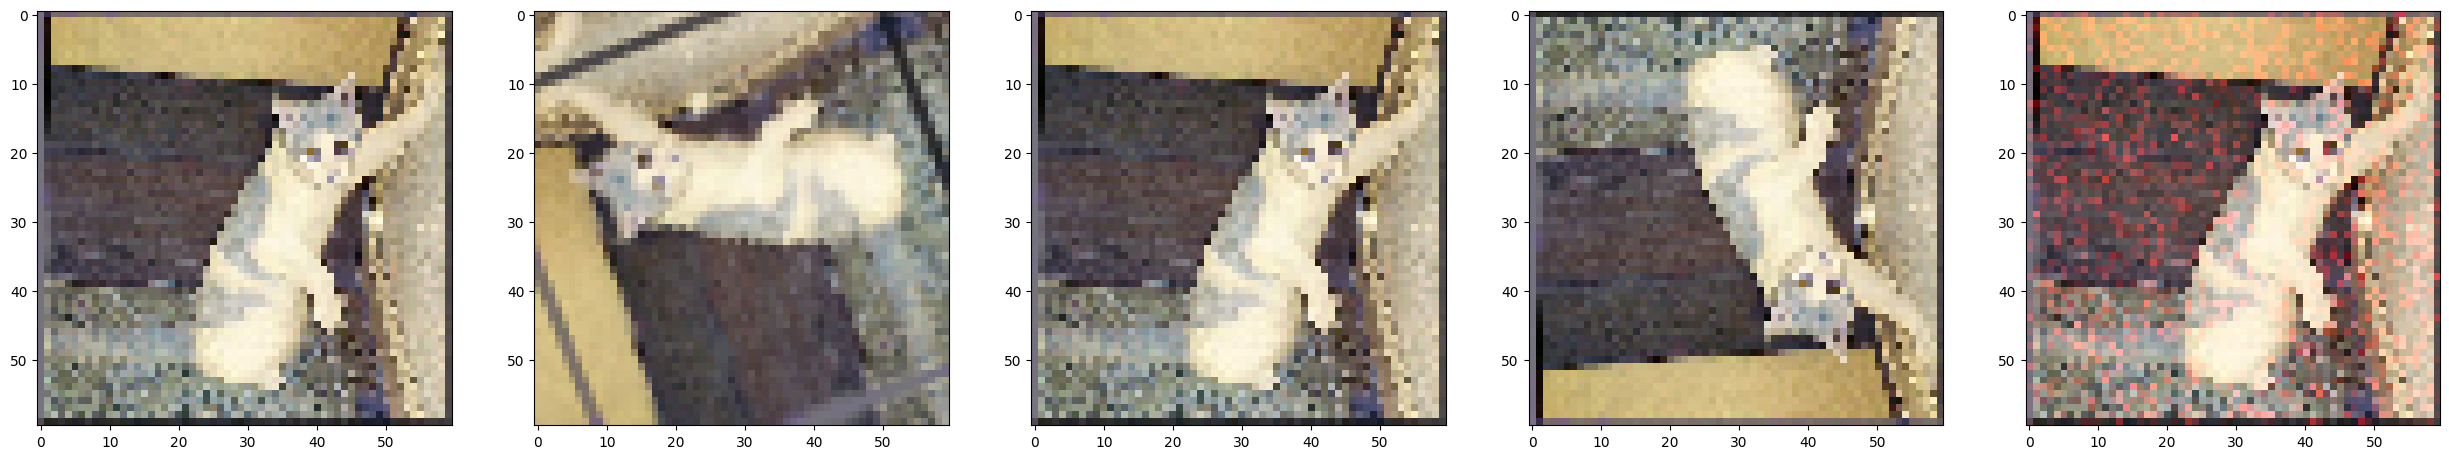

In [ ]:
img_path = BASE_DIR + '/test_set/test_set/cats/cat.4001.jpg' # assigning to picture in the category path
arr = cv2.imread(img_path)
img = cv2.resize(arr, (60, 60))

effects = []

effects.append(img)
effects.append(rotation(img, (60, 60), [cv2.BORDER_REFLECT]))
effects.append(brightness_contrast(img, 1.0))
effects.append(flipping(img))
effects.append(noise(img))

fig, axs = plt.subplots(1,5, figsize=(31, 8))

for index in range(5):
    axs[index].imshow(effects[index])

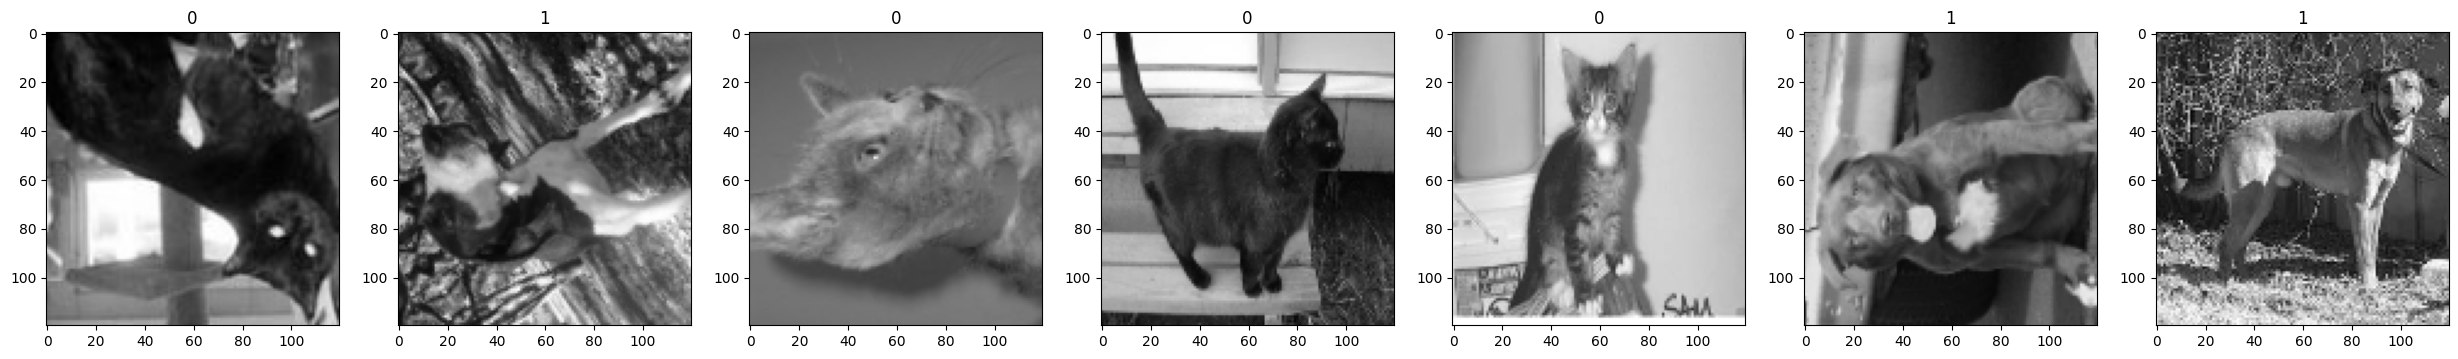

In [ ]:
fig, axs = plt.subplots(1,7, figsize=(31, 8))

def preprocess_img_to_show(img):
    img=(img.reshape(( 120, 120, 1))*255).astype(np.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB )
    return img

for index in range(7):
    axs[index].imshow(preprocess_img_to_show( x_train[index]) )
    axs[index].set_title(y_train[index][0])

<a id='1'></a>
### [__2- Bulding the Model.__](#5)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
callback = EarlyStopping(monitor='val_accuracy', patience=3)

In [ ]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))

model.add(Dropout(0.25))

model.add(Dense(2, activation = 'softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test), callbacks=[callback])

Epoch 1/10
377/377 [==============================] - 27s 42ms/step - loss: 0.6984 - accuracy: 0.5416 - val_loss: 0.7250 - val_accuracy: 0.2147
Epoch 2/10
377/377 [==============================] - 10s 26ms/step - loss: 0.6451 - accuracy: 0.6178 - val_loss: 0.7128 - val_accuracy: 0.5364
Epoch 3/10
377/377 [==============================] - 10s 26ms/step - loss: 0.4794 - accuracy: 0.7704 - val_loss: 0.6702 - val_accuracy: 0.6592
Epoch 4/10
377/377 [==============================] - 10s 26ms/step - loss: 0.2513 - accuracy: 0.8964 - val_loss: 1.0078 - val_accuracy: 0.5787
Epoch 5/10
377/377 [==============================] - 10s 26ms/step - loss: 0.1087 - accuracy: 0.9596 - val_loss: 1.5070 - val_accuracy: 0.5446
Epoch 6/10
377/377 [==============================] - 12s 31ms/step - loss: 0.0515 - accuracy: 0.9821 - val_loss: 2.3040 - val_accuracy: 0.5251


<a id='1'></a>
### [__3- Evaluating the Model.__](#5)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
prediction_lable = np.argmax(y_pred,axis=-1)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test.reshape((y_test.shape[0])), prediction_lable)
print(cm)
accuracy_score(y_test.reshape((y_test.shape[0])), prediction_lable)

# __...........................................................تمت بحمد الله...........................................................__